# Lab 9: Classification

## Clean Data & EDA

### Understand Data

In [197]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [198]:
df = pd.read_csv("bank.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    int64  
 2   sex          600 non-null    object 
 3   region       600 non-null    object 
 4   income       600 non-null    float64
 5   married      600 non-null    object 
 6   children     600 non-null    int64  
 7   car          600 non-null    object 
 8   save_act     600 non-null    object 
 9   current_act  600 non-null    object 
 10  mortgage     600 non-null    object 
 11  pep          600 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 56.4+ KB
None


In [199]:
print(df.describe())

              age        income    children
count  600.000000    600.000000  600.000000
mean    42.395000  27524.031217    1.011667
std     14.424947  12899.468246    1.056752
min     18.000000   5014.210000    0.000000
25%     30.000000  17264.500000    0.000000
50%     42.000000  24925.300000    1.000000
75%     55.250000  36172.675000    2.000000
max     67.000000  63130.100000    3.000000


Normalize Data

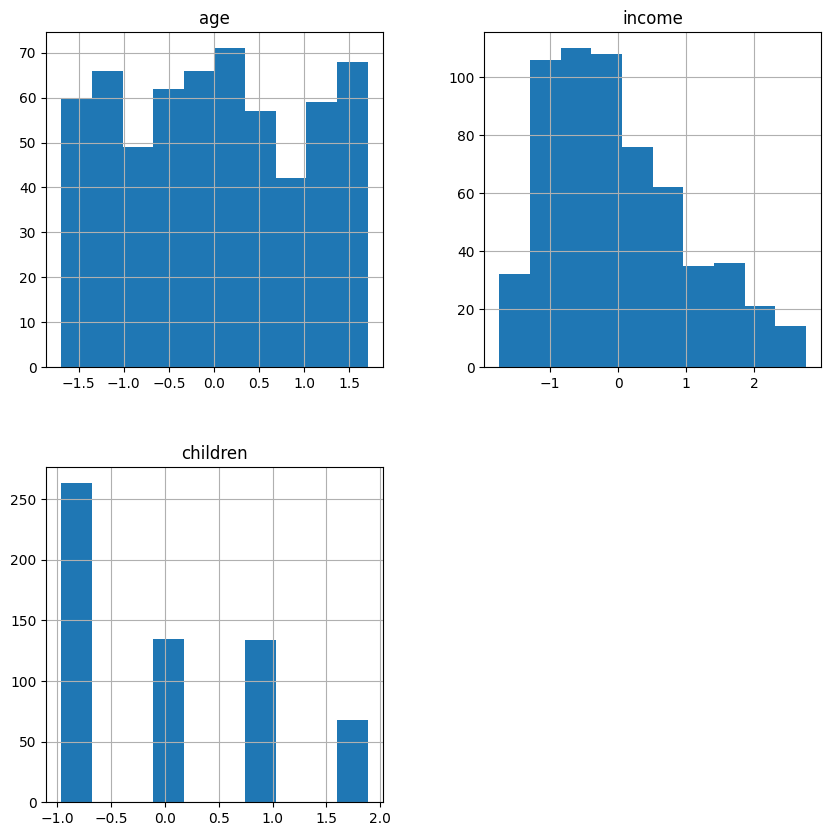

In [200]:
column_to_normalize = ['age', 'income', 'children']
scaler = StandardScaler()
df_normalized = df.copy()
df_normalized[column_to_normalize] = scaler.fit_transform(df[column_to_normalize])
df_normalized.hist(figsize=(10, 10))
plt.show()

In [201]:
# Correlation Matrix
print(df.corr())

               age    income  children
age       1.000000  0.752726  0.023572
income    0.752726  1.000000  0.036761
children  0.023572  0.036761  1.000000


C:\Users\Tonkhaow\AppData\Local\Temp\ipykernel_15600\1160266521.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


Check missing value

In [202]:
print(df.isnull().sum())

id             0
age            0
sex            0
region         0
income         0
married        0
children       0
car            0
save_act       0
current_act    0
mortgage       0
pep            0
dtype: int64


Unique Values

In [203]:
print(df.nunique())

id             600
age             50
sex              2
region           4
income         599
married          2
children         4
car              2
save_act         2
current_act      2
mortgage         2
pep              2
dtype: int64


### Clean Data

Convert data into 0s and 1s

In [204]:
df.replace({"INNER_CITY": 0, "TOWN": 1, "RURAL": 2, "SUBURBAN": 3}, inplace = True)
df.replace({"FEMALE" : 0, "MALE": 1}, inplace = True)
df.replace({"NO" : 0, "YES" : 1}, inplace = True)
print(df)

          id  age  sex  region    income  married  children  car  save_act  \
0    ID12101   48    0       0  17546.00        0         1    0         0   
1    ID12102   40    1       1  30085.10        1         3    1         0   
2    ID12103   51    0       0  16575.40        1         0    1         1   
3    ID12104   23    0       1  20375.40        1         3    0         0   
4    ID12105   57    0       2  50576.30        1         0    0         1   
..       ...  ...  ...     ...       ...      ...       ...  ...       ...   
595  ID12696   61    0       0  47025.00        0         2    1         1   
596  ID12697   30    0       0   9672.25        1         0    1         1   
597  ID12698   31    0       1  15976.30        1         0    1         1   
598  ID12699   29    1       0  14711.80        1         0    0         1   
599  ID12700   38    1       1  26671.60        0         0    1         0   

     current_act  mortgage  pep  
0              0         0   

# Classification Models

## Decision Tree

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from six import StringIO
from IPython.display import Image
import pydotplus


split data

In [206]:
features = ["age", "sex", "region", "income", "married", "children", "car", "save_act", "mortgage"]
X = df[features]
y = df.pep

Train data

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

Create Decision Tree Model

In [208]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8777777777777778


create a decision Tree image

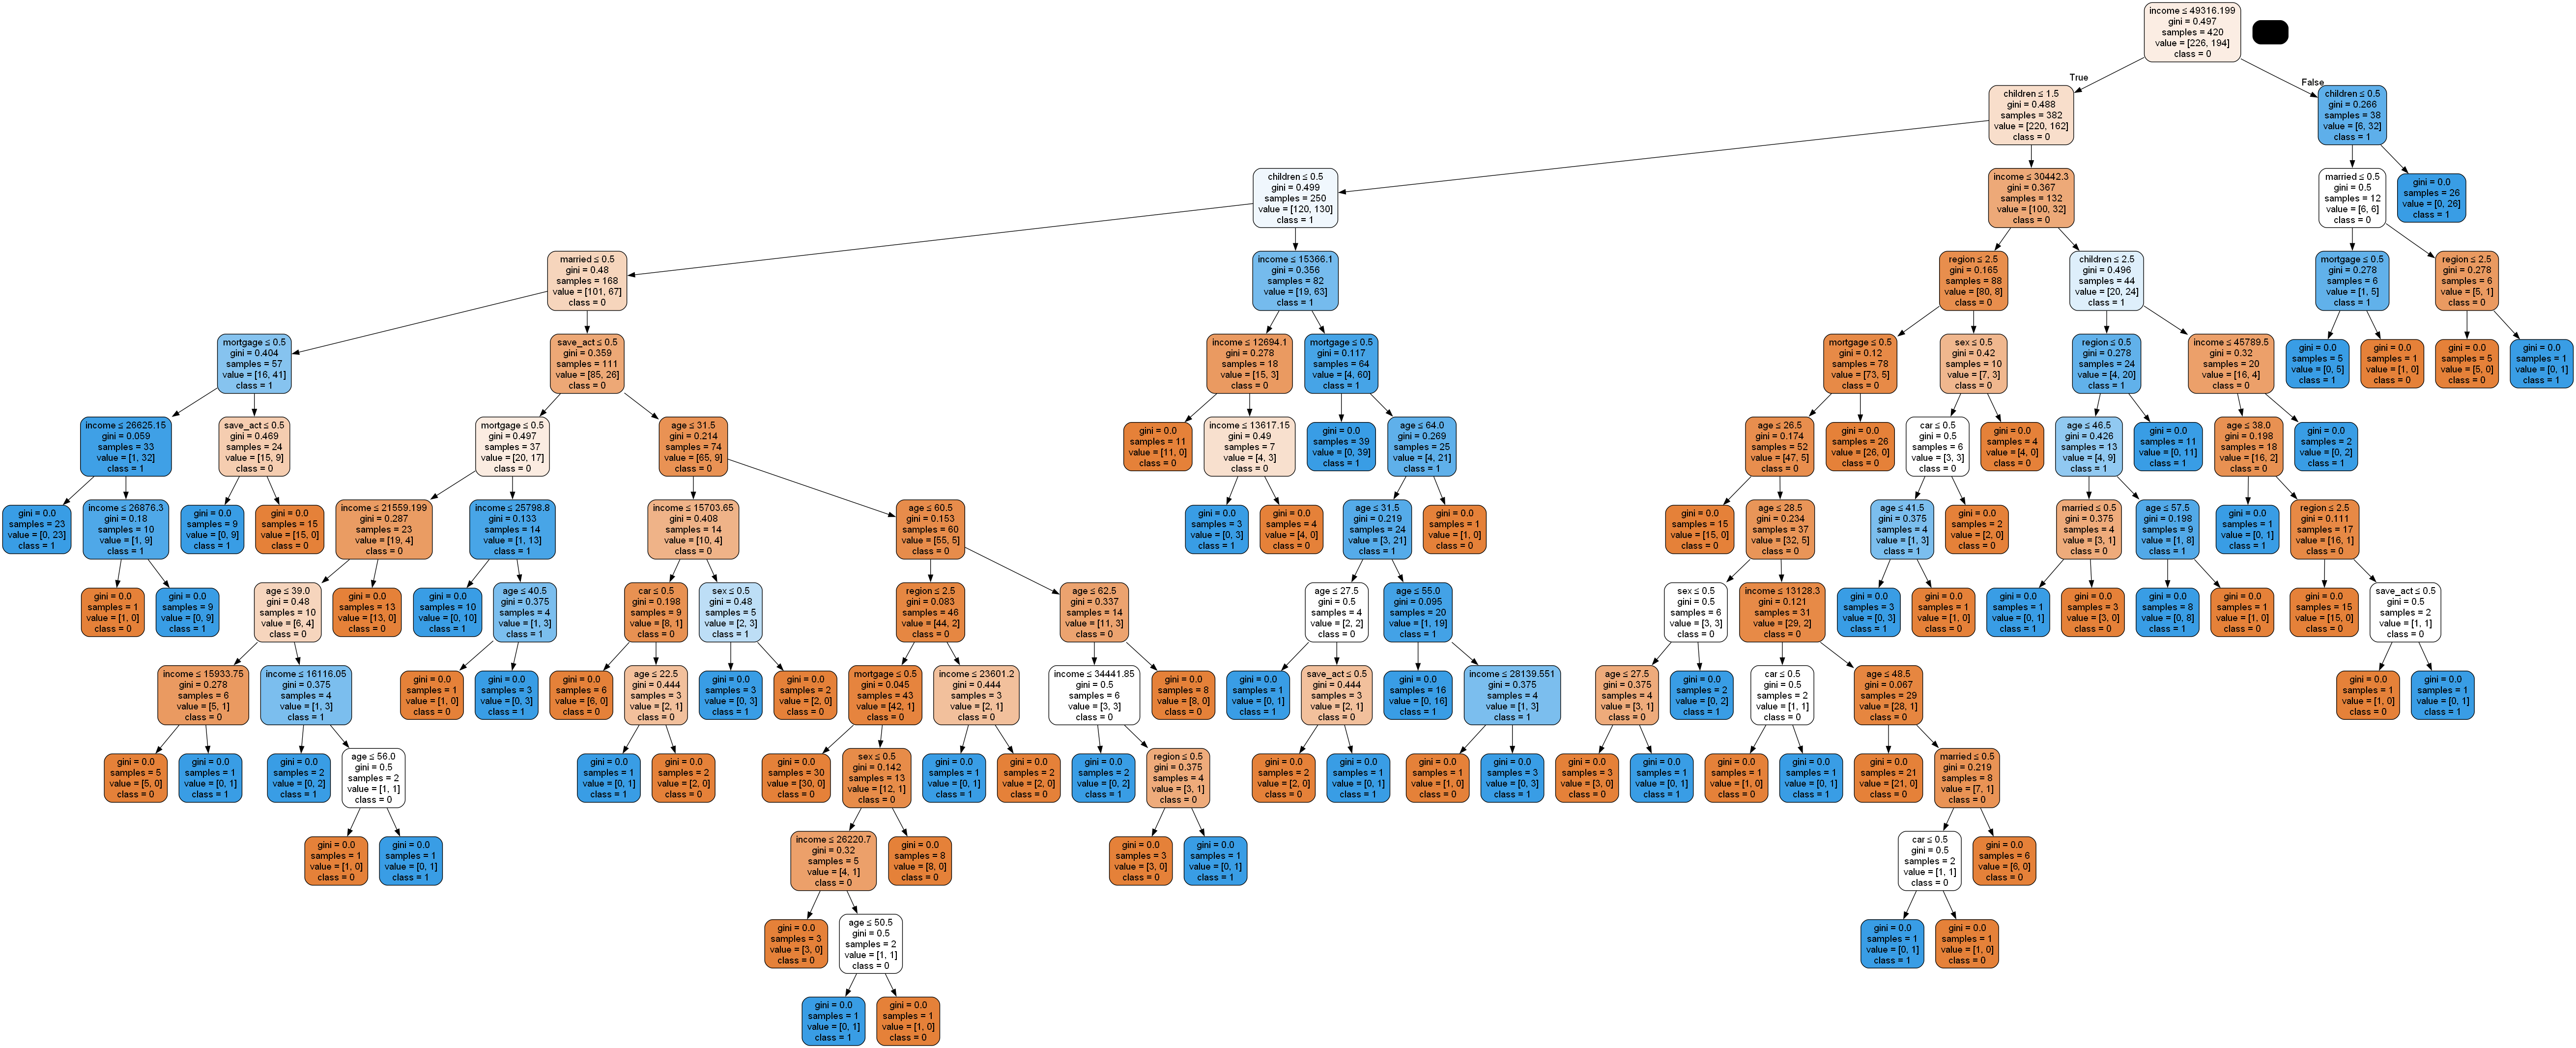

In [209]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled = True, rounded = True, special_characters= True, feature_names= features, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("bankDT.png")
Image(graph.create_png())

### Simplify the Decision Tree

In [210]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8


Create the Decision Tree Image

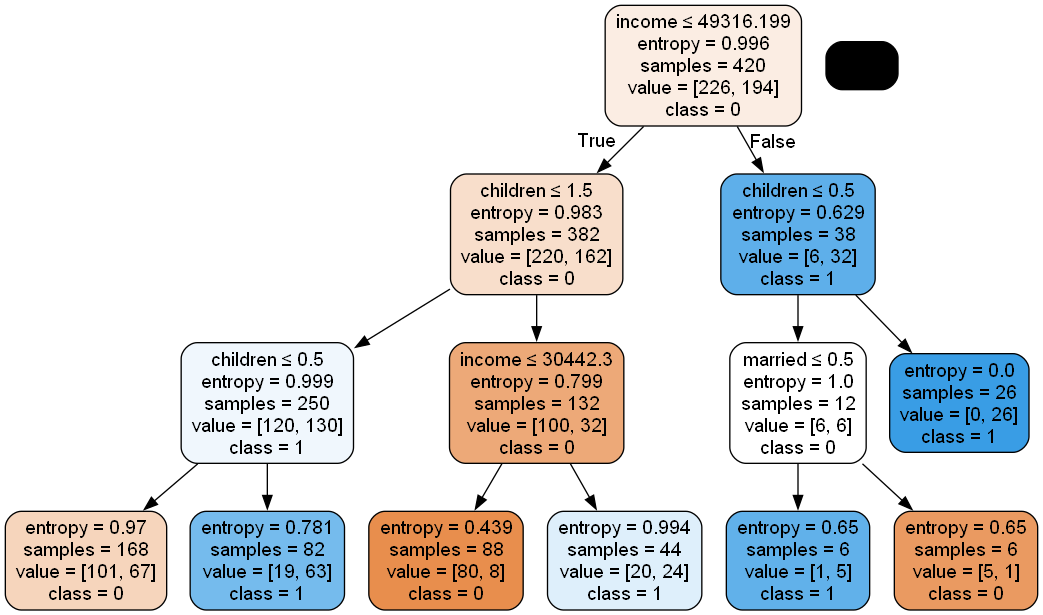

In [211]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled = True, rounded = True, special_characters= True, feature_names= features, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("bankSimplified.png")
Image(graph.create_png())

## KNN

In [212]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import numpy as np
import seaborn as sns

Split Data

In [213]:
features = ["age", "sex", "region", "income", "married", "children", "car", "save_act", "mortgage"]
X = df[features]
y = df.pep 

Train Data

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

Standardize

In [215]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train the model for accuracy

In [216]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7444444444444445


Iterate though K to find the best accuracy

Text(0, 0.5, 'Accuracy Score')

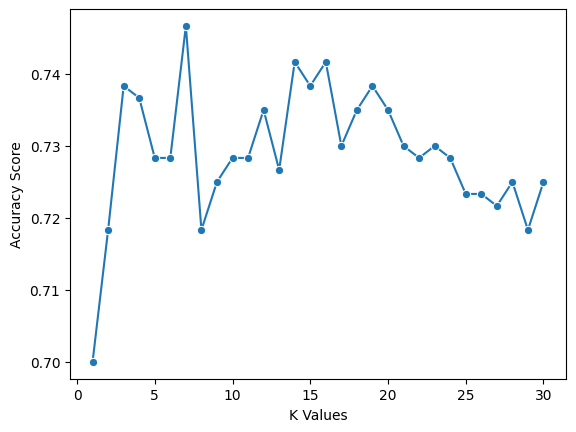

In [217]:
k_values = [i for i in range(1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

Since the best K Value if 7

In [218]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

Accuracy:  0.7277777777777777
Precision:  0.7384615384615385
Recall:  0.6


## Naive Bay

In [219]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

Split Data

In [220]:
features = ["age", "sex", "region", "income", "married", "children", "car", "save_act", "mortgage"]
X = df[features]
y = df.pep 

Train Data

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

Using Gaussian Naive Bay model

In [222]:
model = GaussianNB()

model.fit(X_train, y_train);

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average = "weighted")

print("Accuracy: ", accuray)
print("F1 Score: ", f1)

Accuracy:  0.6277777777777778
F1 Score:  0.6340461552169651


Heat map

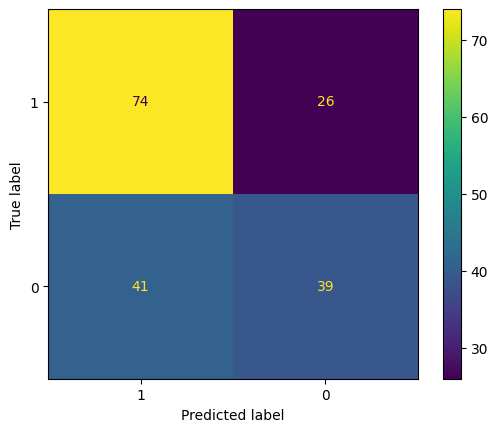

In [223]:
labels = ["1", "0"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

## Logistic Regression

In [224]:
from sklearn.linear_model import LogisticRegression

Split Data

In [225]:
features = ["age", "sex", "region", "income", "married", "children", "car", "save_act", "mortgage"]
X = df[features]
y = df.pep 

Train Data

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

Using Logistic Regression Model

In [227]:
logReg = LogisticRegression(random_state = 16)
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)


Create Confusion Matrix

Text(0.5, 427.9555555555555, 'Predicted Label')

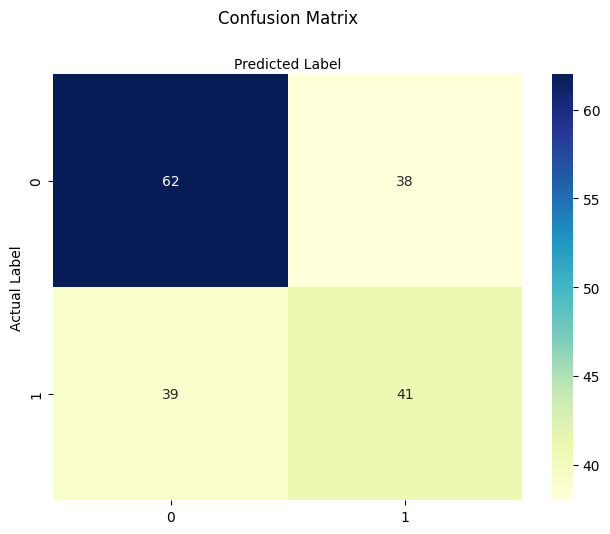

In [228]:
cm = metrics.confusion_matrix(y_test, y_pred)

class_names = [0, 1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y = 1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

Create ROC Curve

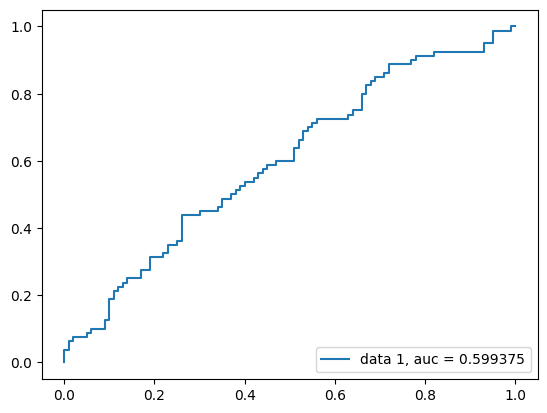

In [229]:
y_pred_proba = logReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)
plt.show()

# What I've Learnt

There are 4 classification models

1. Decision Tree
- Decision Tree model classifies datas by putting it through a series of nodes. Each node will have condition which describe if the data needs to go right or left. You can control the depth of the decision tree. If the more depth, the more accuracy the decision tree will get
- There are 2 methods of classifications which is Gini and Entropy
     - Gini index based it's decision on the error when the data is randomly classified
     - Entropy index is based on whether the data has enough features to correctly classify a data
     - Both methods give the same index which is if 1, the data is unclassified and 0 is classified

2. KNN
- KNN or K nearest neighbor is a method of classification in which the datasets will be classified into clusters. This is determined by a data being near another data which have an index K. You need to iterate through K inorder to get the best accuracy for the model

3. Naive Bay
- Naive Bay classification is to calculate the propability of the data being classified into a class. To visialized it we use confusion matrix to show how well the model performs

4. Logistic Regression
- Logistic regression is a classification model which predicts binary values such as true or false. We use confusion matrix to predict how well the modek performs based on the matrix. We also use ROC Curve to evaluate the performance of the model. The more the value, the better the model will be